# North America, Latin America and Caribbean clustering

The code of the DIANA algorithm is from Github and changed to fit this data. 

## Dataframe Gender

In [1]:
!pip install scikit-learn-extra

In [2]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import silhouette_score
from sklearn_extra.cluster import KMedoids
from sklearn.metrics import davies_bouldin_score
import scipy.cluster.hierarchy as shc
from scipy.cluster.hierarchy import fcluster
from sklearn.cluster import AgglomerativeClustering

In [3]:
df = pd.read_excel('./data/Gender_StatsEXCEL.xlsx',sheet_name='Data')

In [4]:
df = df.iloc[54000:,]
df.drop(columns=df.iloc[:,3:54].columns.tolist(), inplace=True)
df.rename({'Indicator Name':'Indicator'},inplace=True,axis=1)
df.rename({'Country Name':'Country'},inplace=True,axis=1)
df = df.loc[df.Indicator.str.contains('1=yes; 0=no')]
df = df.assign(Mean_GV=df.mean(axis=1, numeric_only=True))
df.drop(columns=df.iloc[:,3:16].columns.tolist(), inplace=True)
del df['Country Code']
df = pd.pivot(df, index=['Country'], columns = 'Indicator',values = 'Mean_GV')

In [5]:
importances = np.array([0.01831044, 0.03237455, 0.0031967 , 0.012108  , 0.01552896,
       0.00758614, 0.00181886, 0.0546642 , 0.01587967, 0.01247531,
       0.02007783, 0.0364012 , 0.03424009, 0.03465867, 0.02593966,
       0.01570586, 0.05781482, 0.01149065, 0.00752398, 0.05290953,
       0.07132007, 0.01305223, 0.03959353, 0.04099451, 0.02862905,
       0.00649011, 0.00942123, 0.00436768, 0.03333931, 0.02942839,
       0.02490152, 0.02989014, 0.0245622 , 0.05561928, 0.11768564])

In [6]:
df.iloc[:,] *= importances
df = df.assign(Gender_Var=df.sum(axis=1, numeric_only=True))
df.dropna(axis=0, inplace = True)
df.drop(columns=df.iloc[:,0:35].columns.tolist(), inplace=True)

## Dataframe Gini

In [7]:
df1 = pd.read_excel('./data/Gender_StatsEXCEL.xlsx',sheet_name='Data')

In [8]:
df1 = df1.iloc[54000:,]
df1.drop(columns=df1.iloc[:,3:54].columns.tolist(), inplace=True)
df1.rename({'Indicator Name':'Indicator'},inplace=True,axis=1)
df1.rename({'Country Name':'Country'},inplace=True,axis=1)
df1 = df1.loc[df1.Indicator.str.contains('Gini index')]
df1 = df1.assign(Gini_Var=df1.mean(axis=1, numeric_only=True))
df1.drop(columns=df1.iloc[:,1:16].columns.tolist(), inplace=True)
df1.dropna(axis=0, inplace = True)

## Dataframe Growth

In [9]:
df2 = pd.read_excel('./data/Gender_StatsEXCEL.xlsx',sheet_name='Data')

In [10]:
df2 = df2.iloc[54000:,]
df2.drop(columns=df2.iloc[:,3:54].columns.tolist(), inplace=True)
df2.rename({'Indicator Name':'Indicator'},inplace=True,axis=1)
df2.rename({'Country Name':'Country'},inplace=True,axis=1)
df2 = df2.loc[df2.Indicator.str.contains('GDP growth')]
df2 = df2.assign(Growth_Var=df2.mean(axis=1, numeric_only=True))
df2.drop(columns=df2.iloc[:,1:16].columns.tolist(), inplace=True)
df2.dropna(axis=0, inplace = True)

## Dataframe continents

In [11]:
df_Continent = pd.read_excel('./data/Gender_StatsEXCEL.xlsx',sheet_name='Country')

In [12]:
print(df_Continent['Region'].unique())

['Latin America & Caribbean' nan 'South Asia' 'Sub-Saharan Africa'
 'Europe & Central Asia' 'Middle East & North Africa'
 'East Asia & Pacific' 'North America']


In [13]:
df_Continent = df_Continent[['Table Name', 'Region']]
df_Continent.rename({'Table Name':'Country'},inplace=True,axis=1)
df_Continent.dropna(axis=0, inplace = True)
df_Continent.head()

,Country,Region
0,Aruba,Latin America & Caribbean
2,Afghanistan,South Asia
4,Angola,Sub-Saharan Africa
5,Albania,Europe & Central Asia
6,Andorra,Europe & Central Asia


## Dataframe Gender-Growth

In [15]:
df_Gender_Growth = df.merge(df2,how='inner',left_on='Country', right_on='Country')
df_Gender_Growth = df_Gender_Growth.merge(df_Continent, how='inner',left_on='Country', right_on='Country')
df_Gender_Growth.head()

,Country,Gender_Var,Growth_Var,Region
0,Afghanistan,0.187844,2.019799,South Asia
1,Albania,0.750623,2.576940,Europe & Central Asia
2,Algeria,0.470927,2.108333,Middle East & North Africa
3,Angola,0.559647,1.527807,Sub-Saharan Africa
4,Antigua and Barbuda,0.473140,0.504912,Latin America & Caribbean


## Dataframe Gini-Growth

In [16]:
df_Gini_Growth = df1.merge(df2,how='inner',left_on='Country', right_on='Country')
df_Gini_Growth = df_Gini_Growth.merge(df_Continent, how='inner',left_on='Country', right_on='Country')
df_Gini_Growth.head()

,Country,Gini_Var,Growth_Var,Region
0,Albania,32.014286,2.576940,Europe & Central Asia
1,Algeria,27.600000,2.108333,Middle East & North Africa
2,Angola,51.300000,1.527807,Sub-Saharan Africa
3,Argentina,41.960000,1.191811,Latin America & Caribbean
4,Armenia,30.827273,3.600000,Europe & Central Asia


## Filter on North America, Latin America and the Caribbean

In [17]:
df_Gender_Growth_NA_LA = df_Gender_Growth.loc[df_Gender_Growth['Region'].isin(['North America','Latin America & Caribbean'])]
df_Gini_Growth_NA_LA = df_Gini_Growth.loc[df_Gini_Growth['Region'].isin(['North America','Latin America & Caribbean'])]

In [19]:
df_Gini_Growth_NA_LA.shape

(21, 4)

In [ ]:
def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x'], point['y'], str(point['val']))

## Gender-Growth Variable

### K-means clustering

In [60]:
df_Gender_Growth_NA_LA_K = df_Gender_Growth_NA_LA[['Gender_Var', 'Growth_Var']]

In [61]:
sse_ = []
for k in range(2,10):
    kmeans = KMeans(n_clusters = k).fit(df_Gender_Growth_NA_LA_K)
    sse_.append([k, silhouette_score(df_Gender_Growth_NA_LA_K, kmeans.labels_)])
sse_

[[2, 0.599512624284257],
 [3, 0.5474533310777814],
 [4, 0.5970756731136535],
 [5, 0.6264615824252916],
 [6, 0.6217163406726925],
 [7, 0.6578337931430477],
 [8, 0.6536758199878427],
 [9, 0.6279603920363136]]

In [62]:
DB_ = []
for k in range(2,10):
    kmeans = KMeans(n_clusters = k, random_state = 42).fit(df_Gender_Growth_NA_LA_K)
    DB_.append([k, davies_bouldin_score(df_Gender_Growth_NA_LA_K, kmeans.labels_)])
DB_

[[2, 0.5697891415824146],
 [3, 0.41422636748032926],
 [4, 0.38348768241589687],
 [5, 0.3221237479601711],
 [6, 0.3492587614494635],
 [7, 0.3192692322857887],
 [8, 0.30554828379158083],
 [9, 0.3050937236120077]]

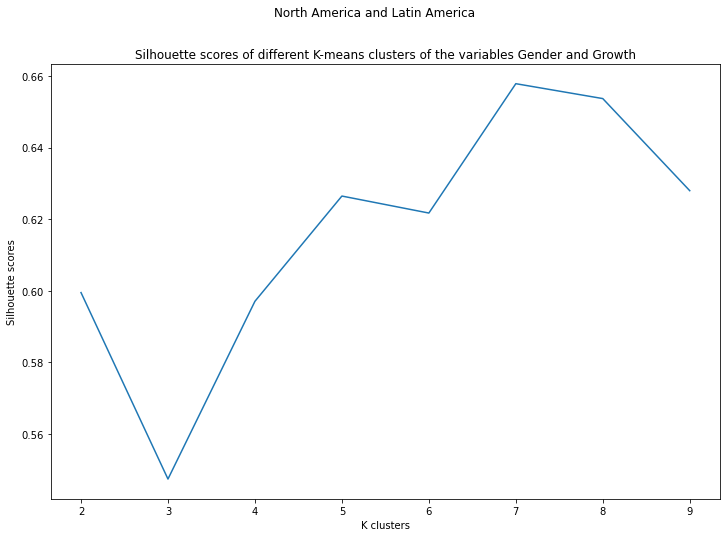

In [63]:
fig = plt.figure(figsize = (12,8))
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1])
plt.title("Silhouette scores of different K-means clusters of the variables Gender and Growth")
plt.ylabel("Silhouette scores")
plt.xlabel("K clusters")
plt.suptitle("North America and Latin America")
plt.show()

In [64]:
model_clus1 = KMeans(n_clusters = 7, random_state = 42)
model_clus1.fit(df_Gender_Growth_NA_LA_K)
data1 = df_Gender_Growth_NA_LA_K
data1.index = pd.RangeIndex(len(data1.index))
df_Gender_Growth_NA_LA_K = pd.concat([data1, pd.Series(model_clus1.labels_)], axis = 1)
df_Gender_Growth_NA_LA_K.columns = ['Gender_Var', 'Growth_Var', 'ClusterID_K']
df_Gender_Growth_NA_LA_K['ClusterID_K'].value_counts()

1    9
3    8
6    7
0    6
4    2
5    2
2    1
Name: ClusterID_K, dtype: int64

In [65]:
 df_Gender_Growth_NA_LA = pd.merge(df_Gender_Growth_NA_LA,  df_Gender_Growth_NA_LA_K, how = 'inner', left_on=['Gender_Var', 'Growth_Var'], right_on=['Gender_Var', 'Growth_Var'])

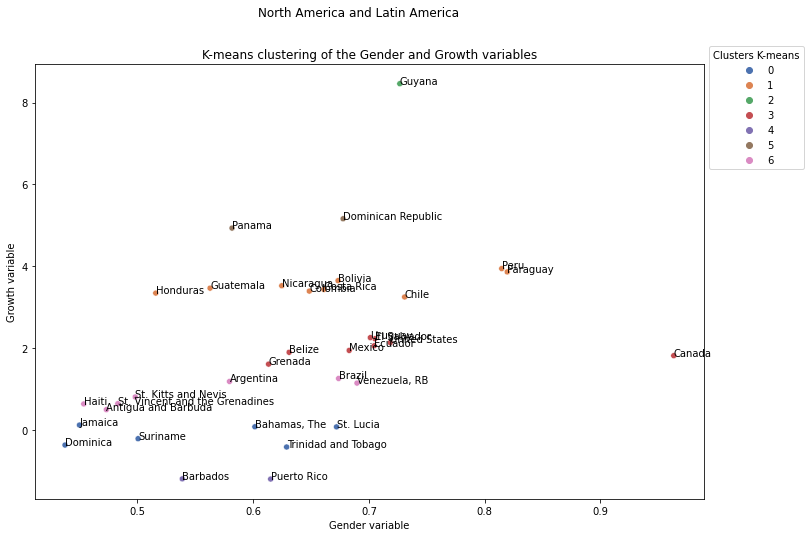

In [66]:
fig = plt.figure(figsize = (12,8))
sns.scatterplot(x='Gender_Var', y = 'Growth_Var', hue = 'ClusterID_K', legend = 'full', palette="deep", data = df_Gender_Growth_NA_LA)
plt.title('K-means clustering of the Gender and Growth variables')
plt.suptitle("North America and Latin America")
plt.ylabel("Growth variable")
plt.xlabel("Gender variable")
label_point(df_Gender_Growth_NA_LA.Gender_Var, df_Gender_Growth_NA_LA.Growth_Var, df_Gender_Growth_NA_LA.Country, plt.gca()) 
plt.legend(title='Clusters K-means', loc='center left', bbox_to_anchor = (1,0.9))
plt.show()

In [67]:
Cluster_Gender = pd.DataFrame(df_Gender_Growth_NA_LA.groupby(['ClusterID_K']).Gender_Var.mean())
Cluster_Growth = pd.DataFrame(df_Gender_Growth_NA_LA.groupby(['ClusterID_K']).Growth_Var.mean())
dt_NA_LA_knn_Gender_Growth = pd.concat([Cluster_Gender, Cluster_Growth], axis = 1)
dt_NA_LA_knn_Gender_Growth

,Gender_Var,Growth_Var
ClusterID_K,,
0,0.548376,-0.112083
1,0.672362,3.544650
2,0.726676,8.459465
3,0.714990,1.999036
4,0.576926,-1.186940
5,0.629705,5.049148
6,0.550127,0.888791


### K-medoids clustering

In [68]:
df_Gender_Growth_NA_LA_KM = df_Gender_Growth_NA_LA[['Gender_Var', 'Growth_Var']]

In [69]:
sse_ = []
for k in range(2,10):
    kmedoids = KMedoids(n_clusters = k, method = 'pam').fit(df_Gender_Growth_NA_LA_KM)
    sse_.append([k, silhouette_score(df_Gender_Growth_NA_LA_KM, kmedoids.labels_)])
sse_

[[2, 0.5310007438264881],
 [3, 0.5507246157456501],
 [4, 0.5970756731136535],
 [5, 0.574006907144668],
 [6, 0.6217163406726925],
 [7, 0.6578337931430477],
 [8, 0.6536758199878427],
 [9, 0.6228643072175583]]

In [70]:
DB_ = []
for k in range(2,10):
    kmedoids = KMedoids(n_clusters = k, random_state = 42).fit(df_Gender_Growth_NA_LA_KM)
    DB_.append([k, davies_bouldin_score(df_Gender_Growth_NA_LA_KM, kmedoids.labels_)])
DB_

[[2, 0.5726188004461733],
 [3, 0.5433009142936137],
 [4, 0.5543049633553678],
 [5, 0.5972874995933074],
 [6, 0.6254209250292513],
 [7, 0.6069991376925772],
 [8, 0.6471325135077245],
 [9, 0.5533340128316794]]

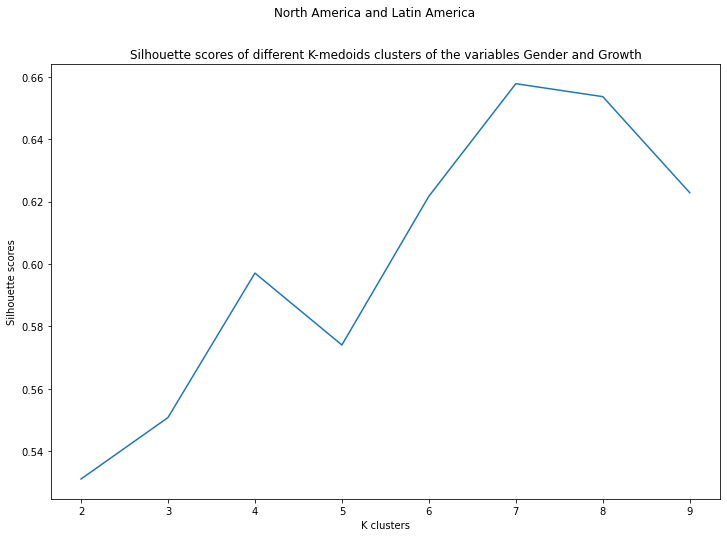

In [71]:
fig = plt.figure(figsize = (12,8))
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1])
plt.title("Silhouette scores of different K-medoids clusters of the variables Gender and Growth")
plt.ylabel("Silhouette scores")
plt.xlabel("K clusters")
plt.suptitle("North America and Latin America")
plt.show()

In [72]:
model_clus2 = KMedoids(n_clusters = 7, random_state = 42, method = 'pam')
model_clus2.fit(df_Gender_Growth_NA_LA_KM)
data2 = df_Gender_Growth_NA_LA_KM
data2.index = pd.RangeIndex(len(data2.index))
df_Gender_Growth_NA_LA_KM = pd.concat([data2, pd.Series(model_clus2.labels_)], axis = 1)
df_Gender_Growth_NA_LA_KM.columns = ['Gender_Var', 'Growth_Var', 'ClusterID_KM']
df_Gender_Growth_NA_LA_KM['ClusterID_KM'].value_counts()

5    9
0    8
2    7
4    6
6    2
3    2
1    1
Name: ClusterID_KM, dtype: int64

In [73]:
df_Gender_Growth_NA_LA = pd.merge(df_Gender_Growth_NA_LA, df_Gender_Growth_NA_LA_KM, how = 'inner', left_on=['Gender_Var', 'Growth_Var'], right_on=['Gender_Var', 'Growth_Var'])

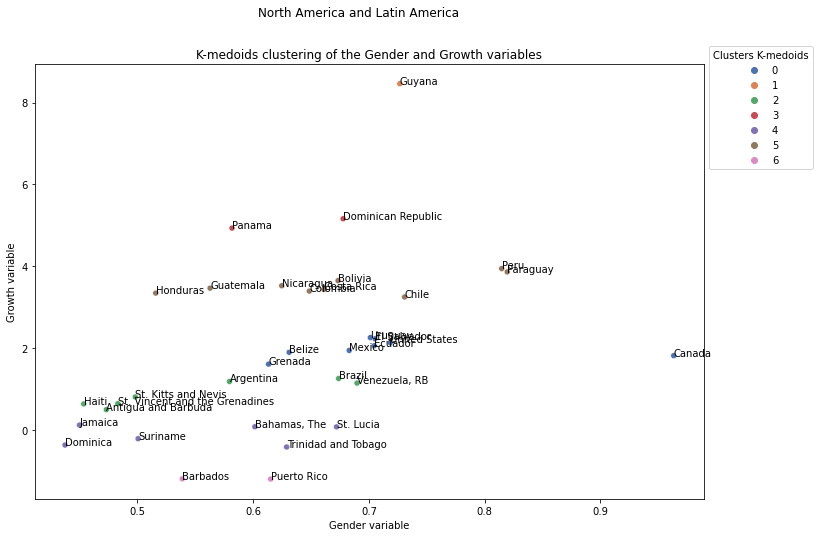

In [74]:
fig = plt.figure(figsize = (12,8))
sns.scatterplot(x='Gender_Var', y = 'Growth_Var', hue = 'ClusterID_KM', legend = 'full', palette="deep", data = df_Gender_Growth_NA_LA)
plt.title('K-medoids clustering of the Gender and Growth variables')
plt.suptitle("North America and Latin America")
plt.ylabel("Growth variable")
plt.xlabel("Gender variable")
label_point(df_Gender_Growth_NA_LA.Gender_Var, df_Gender_Growth_NA_LA.Growth_Var, df_Gender_Growth_NA_LA.Country, plt.gca()) 
plt.legend(title='Clusters K-medoids', loc='center left', bbox_to_anchor = (1,0.9))
plt.show()

In [75]:
Cluster_Gender = pd.DataFrame(df_Gender_Growth_NA_LA_KM.groupby(['ClusterID_KM']).Gender_Var.mean())
Cluster_Growth = pd.DataFrame(df_Gender_Growth_NA_LA_KM.groupby(['ClusterID_KM']).Growth_Var.mean())
dt_NA_LA_km_Gender_Growth = pd.concat([Cluster_Gender, Cluster_Growth], axis = 1)
dt_NA_LA_km_Gender_Growth

,Gender_Var,Growth_Var
ClusterID_KM,,
0,0.714990,1.999036
1,0.726676,8.459465
2,0.550127,0.888791
3,0.629705,5.049148
4,0.548376,-0.112083
5,0.672362,3.544650
6,0.576926,-1.186940


### AGNES clustering

In [76]:
import scipy.cluster.hierarchy as shc
from scipy.cluster.hierarchy import fcluster
from sklearn.cluster import AgglomerativeClustering

In [77]:
df_Gender_Growth_NA_LA_A = df_Gender_Growth_NA_LA[['Gender_Var', 'Growth_Var']]

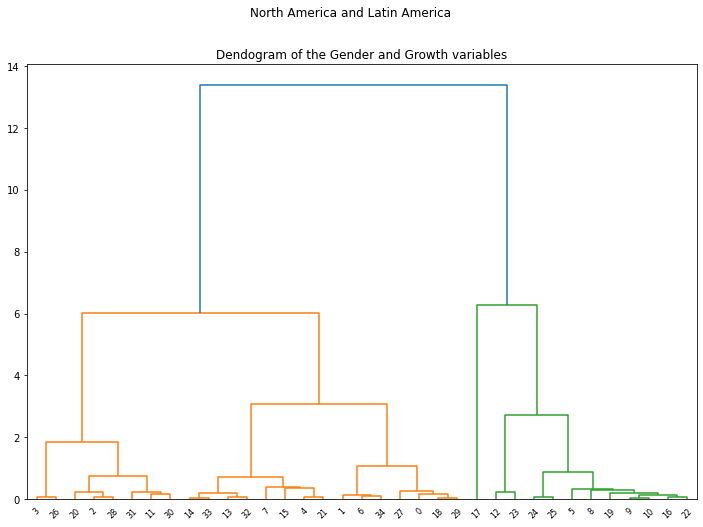

In [78]:
fig = plt.figure(figsize = (12,8))
plt.title('Dendogram of the Gender and Growth variables')
plt.suptitle("North America and Latin America")
dend = shc.dendrogram(shc.linkage(df_Gender_Growth_NA_LA_A, method = 'ward'))

In [79]:
sse_ = []
for k in range (2,10):
    clustering = AgglomerativeClustering(n_clusters = k, affinity = 'euclidean' ,linkage = 'ward')
    cluster_labels = clustering.fit_predict(df_Gender_Growth_NA_LA_A)
    silhouette_average = silhouette_score(df_Gender_Growth_NA_LA_A, cluster_labels)
    sse_.append([k, silhouette_average])
sse_

[[2, 0.599512624284257],
 [3, 0.579133456954156],
 [4, 0.5663009617460354],
 [5, 0.574006907144668],
 [6, 0.6217163406726925],
 [7, 0.6578337931430477],
 [8, 0.6600712718720246],
 [9, 0.6279603920363136]]

In [80]:
DB_ = []
for k in range (2,10):
    clustering = AgglomerativeClustering(n_clusters = k, affinity = 'euclidean' ,linkage = 'ward')
    cluster_labels = clustering.fit_predict(df_Gender_Growth_NA_LA_A)
    davies_bouldin = davies_bouldin_score(df_Gender_Growth_NA_LA_A, cluster_labels)
    DB_.append([k, davies_bouldin])
DB_

[[2, 0.5697891415824146],
 [3, 0.3581587760201386],
 [4, 0.40977545099177787],
 [5, 0.41099805212062135],
 [6, 0.3492587614494634],
 [7, 0.31926923228578874],
 [8, 0.28299669592966],
 [9, 0.2832995250292652]]

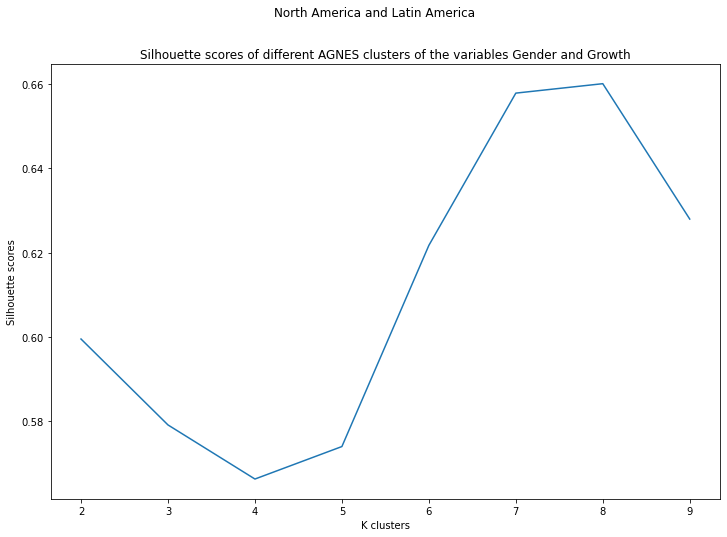

In [81]:
fig = plt.figure(figsize = (12,8))
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1])
plt.title("Silhouette scores of different AGNES clusters of the variables Gender and Growth")
plt.ylabel("Silhouette scores")
plt.xlabel("K clusters")
plt.suptitle("North America and Latin America")
plt.show()

In [82]:
cluster = AgglomerativeClustering(n_clusters = 8, affinity = 'euclidean' ,linkage = 'ward')
ClusterID_A = cluster.fit_predict(df_Gender_Growth_NA_LA_A)
ClusterID_A

array([3, 7, 1, 6, 4, 0, 7, 4, 0, 0, 0, 1, 2, 4, 4, 4, 0, 5, 3, 0, 1, 4,
       0, 2, 0, 0, 6, 3, 1, 3, 1, 1, 4, 4, 7])

In [83]:
df_Gender_Growth_NA_LA['ClusterID_A'] = [3, 7, 1, 6, 4, 0, 7, 4, 0, 0, 0, 1, 2, 4, 4, 4, 0, 5, 3, 0, 1, 4,
       0, 2, 0, 0, 6, 3, 1, 3, 1, 1, 4, 4, 7]

In [84]:
df_Gender_Growth_NA_LA['ClusterID_A'].value_counts()

0    9
4    8
1    6
3    4
7    3
6    2
2    2
5    1
Name: ClusterID_A, dtype: int64

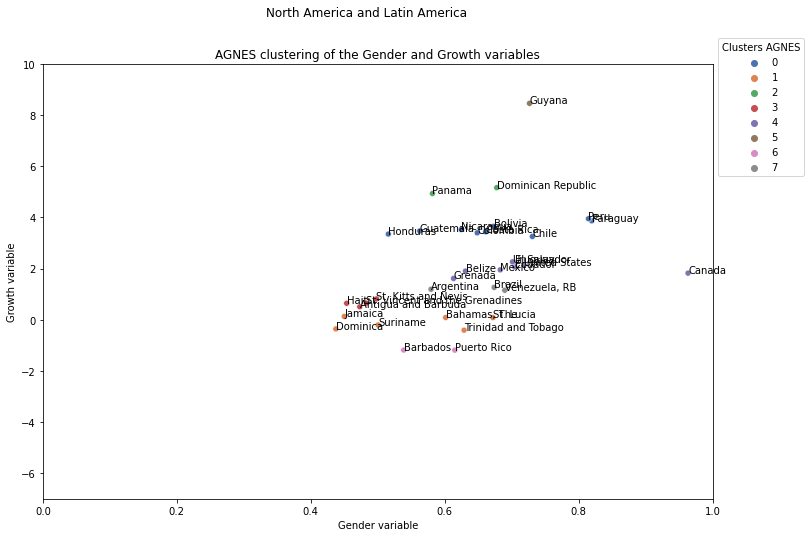

In [85]:
fig = plt.figure(figsize = (12,8))
sns.scatterplot(x='Gender_Var', y = 'Growth_Var', hue = 'ClusterID_A', legend = 'full', palette="deep", data = df_Gender_Growth_NA_LA)
plt.title('AGNES clustering of the Gender and Growth variables')
plt.suptitle("North America and Latin America")
plt.ylabel("Growth variable")
plt.xlabel("Gender variable")
plt.xlim([0,1])
plt.ylim([-7,10])
label_point(df_Gender_Growth_NA_LA.Gender_Var, df_Gender_Growth_NA_LA.Growth_Var, df_Gender_Growth_NA_LA.Country, plt.gca()) 
plt.legend(title='Clusters AGNES', loc='center left', bbox_to_anchor = (1,0.9))
plt.show()

In [86]:
Cluster_Gender = pd.DataFrame(df_Gender_Growth_NA_LA.groupby(['ClusterID_A']).Gender_Var.mean())
Cluster_Growth = pd.DataFrame(df_Gender_Growth_NA_LA.groupby(['ClusterID_A']).Growth_Var.mean())
dt_NA_LA_A_Gender_Growth = pd.concat([Cluster_Gender, Cluster_Growth], axis = 1)
dt_NA_LA_A_Gender_Growth

,Gender_Var,Growth_Var
ClusterID_A,,
0,0.672362,3.544650
1,0.548376,-0.112083
2,0.629705,5.049148
3,0.476963,0.653088
4,0.714990,1.999036
5,0.726676,8.459465
6,0.576926,-1.186940
7,0.647678,1.203062


### DIANA clustering

In [87]:
df_Gender_Growth_NA_LA_D = df_Gender_Growth_NA_LA[['Gender_Var', 'Growth_Var']]

In [88]:
from scipy.spatial import distance_matrix

def DIANA(data, n_clusters):
    n_samples = len(data)
    n_features = 2
    similarity_matrix = distance_matrix(data.values, data.values) # similarity matrix of the data
    clusters = [list(range(n_samples))]      # list of clusters, initially the whole dataset is a single cluster
    while True:
        c_diameters = [np.max(similarity_matrix[cluster][:, cluster]) for cluster in clusters]  #cluster diameters
        max_cluster_dia = np.argmax(c_diameters)  #maximum cluster diameter
        max_difference_index = np.argmax(np.mean(similarity_matrix[clusters[max_cluster_dia]][:, clusters[max_cluster_dia]], axis=1))
        splinters = [clusters[max_cluster_dia][max_difference_index]] #spinter group
        last_clusters = clusters[max_cluster_dia]
        del last_clusters[max_difference_index]
        while True:
            split = False
            for j in range(len(last_clusters))[::-1]:
                splinter_distances = similarity_matrix[last_clusters[j], splinters]
                last_distances = similarity_matrix[last_clusters[j], np.delete(last_clusters, j, axis=0)]
                if np.mean(splinter_distances) <= np.mean(last_distances):
                    splinters.append(last_clusters[j])
                    del last_clusters[j]
                    split = True
                    break
            if split == False:
                break
        del clusters[max_cluster_dia]
        clusters.append(splinters)
        clusters.append(last_clusters)
        if len(clusters) == n_clusters:
            break

    cluster_labels = np.zeros(n_samples)
    for i in range(len(clusters)):
        cluster_labels[clusters[i]] = i

    return cluster_labels

In [89]:
sse_ = []
for k in range (2,10):
    clustering = DIANA(df_Gender_Growth_NA_LA_D, k)
    silhouette_average = silhouette_score(df_Gender_Growth_NA_LA_D, clustering)
    sse_.append([k, silhouette_average])
sse_

[[2, 0.599512624284257],
 [3, 0.579133456954156],
 [4, 0.5970756731136535],
 [5, 0.5928844270062005],
 [6, 0.6240095690666557],
 [7, 0.6115259347627275],
 [8, 0.6536758199878427],
 [9, 0.6228643072175583]]

In [90]:
DB_ = []
for k in range (2,10):
    clustering = DIANA(df_Gender_Growth_NA_LA_D, k)
    davies_bouldin = davies_bouldin_score(df_Gender_Growth_NA_LA_D, clustering)
    DB_.append([k, davies_bouldin])
DB_

[[2, 0.5697891415824146],
 [3, 0.3581587760201386],
 [4, 0.38348768241589687],
 [5, 0.35724819222078547],
 [6, 0.3091760336941071],
 [7, 0.29597872395447256],
 [8, 0.30554828379158083],
 [9, 0.3050937236120078]]

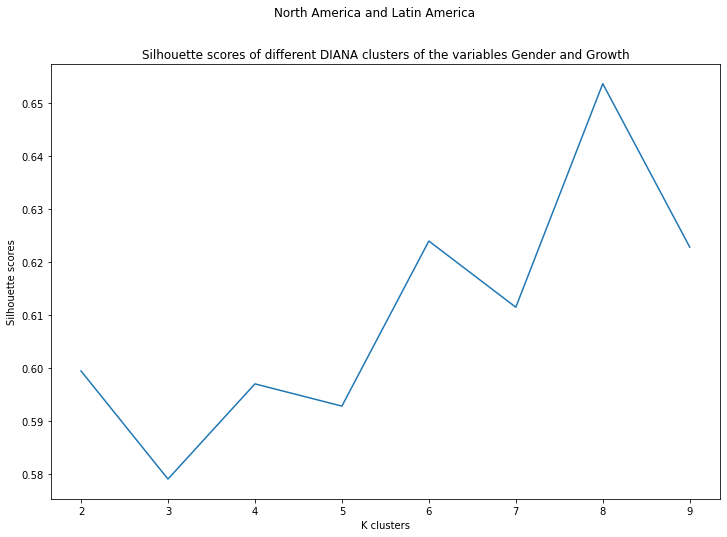

In [91]:
fig = plt.figure(figsize = (12,8))
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1])
plt.title("Silhouette scores of different DIANA clusters of the variables Gender and Growth")
plt.ylabel("Silhouette scores")
plt.xlabel("K clusters")
plt.suptitle("North America and Latin America")
plt.show()

In [92]:
DIANA(df_Gender_Growth_NA_LA_D, 8)

array([5., 6., 4., 1., 7., 3., 6., 7., 3., 3., 3., 4., 2., 7., 7., 6., 3.,
       0., 5., 3., 4., 7., 3., 2., 3., 3., 1., 5., 4., 5., 4., 4., 7., 7.,
       6.])

In [93]:
df_Gender_Growth_NA_LA['ClusterID_D'] = [round(float(i)) for i in [5., 6., 4., 1., 7., 3., 6., 7., 3., 3., 3., 4., 2., 7., 7., 6., 3.,
       0., 5., 3., 4., 7., 3., 2., 3., 3., 1., 5., 4., 5., 4., 4., 7., 7.,
       6.]]

In [94]:
df_Gender_Growth_NA_LA['ClusterID_D'].value_counts()

3    9
7    7
4    6
5    4
6    4
1    2
2    2
0    1
Name: ClusterID_D, dtype: int64

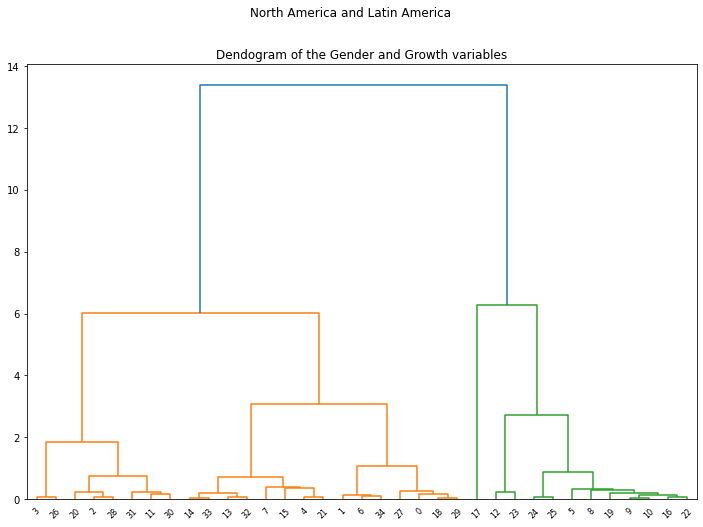

In [95]:
fig = plt.figure(figsize = (12,8))
plt.title('Dendogram of the Gender and Growth variables')
plt.suptitle("North America and Latin America")
dend = shc.dendrogram(shc.linkage(df_Gender_Growth_NA_LA_D, method = 'ward'))

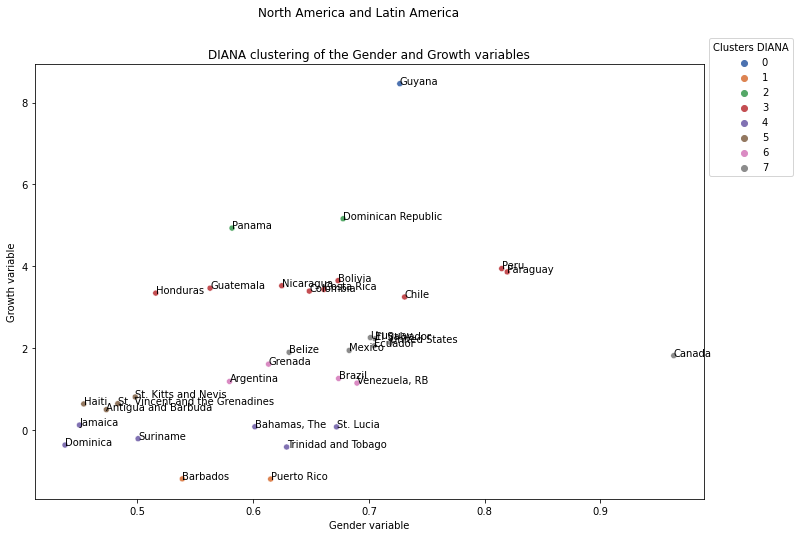

In [96]:
fig = plt.figure(figsize = (12,8))
sns.scatterplot(x='Gender_Var', y = 'Growth_Var', hue = 'ClusterID_D', legend = 'full', palette="deep", data = df_Gender_Growth_NA_LA)
plt.title('DIANA clustering of the Gender and Growth variables')
plt.suptitle("North America and Latin America")
plt.ylabel("Growth variable")
plt.xlabel("Gender variable")
label_point(df_Gender_Growth_NA_LA.Gender_Var, df_Gender_Growth_NA_LA.Growth_Var, df_Gender_Growth_NA_LA.Country, plt.gca()) 
plt.legend(title='Clusters DIANA', loc='center left', bbox_to_anchor = (1,0.9))
plt.show()

## Growth-Gini Variable

### K-means clustering

In [98]:
df_Gini_Growth_NA_LA_K = df_Gini_Growth_NA_LA[['Growth_Var', 'Gini_Var']]

In [99]:
sse_ = []
for k in range(2,10):
    kmeans = KMeans(n_clusters = k).fit(df_Gini_Growth_NA_LA_K)
    sse_.append([k, silhouette_score(df_Gini_Growth_NA_LA_K, kmeans.labels_)])
sse_

[[2, 0.5174154594053386],
 [3, 0.49001944662077446],
 [4, 0.4977812197085535],
 [5, 0.4692853934278406],
 [6, 0.49484806035856543],
 [7, 0.4786707237751437],
 [8, 0.48952593142445594],
 [9, 0.4610644851305929]]

In [100]:
DB_ = []
for k in range(2,10):
    kmeans = KMeans(n_clusters = k, random_state = 42).fit(df_Gini_Growth_NA_LA_K)
    DB_.append([k, davies_bouldin_score(df_Gini_Growth_NA_LA_K, kmeans.labels_)])
DB_

[[2, 0.5974461600741964],
 [3, 0.648359564835051],
 [4, 0.48313450939066727],
 [5, 0.5319283078321705],
 [6, 0.4872864821946426],
 [7, 0.5405469653471365],
 [8, 0.5250691543441421],
 [9, 0.5256401459259995]]

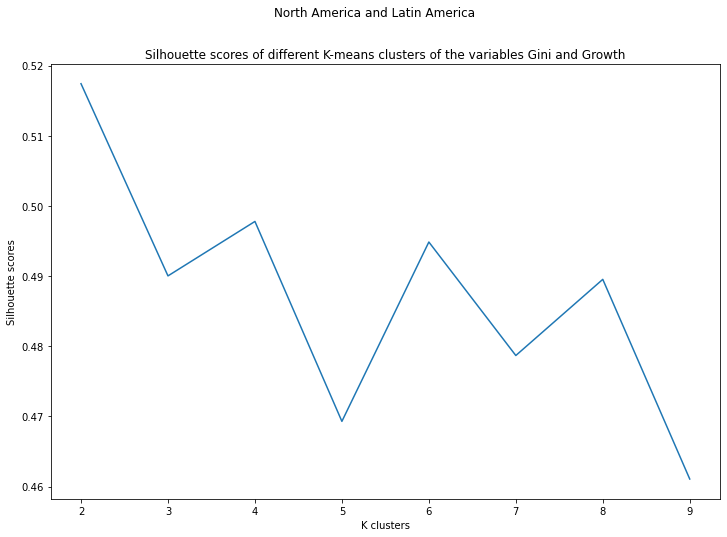

In [101]:
fig = plt.figure(figsize = (12,8))
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1])
plt.title("Silhouette scores of different K-means clusters of the variables Gini and Growth")
plt.ylabel("Silhouette scores")
plt.xlabel("K clusters")
plt.suptitle("North America and Latin America")
plt.show()

In [102]:
model_clus1 = KMeans(n_clusters = 4, random_state = 42)
model_clus1.fit(df_Gini_Growth_NA_LA_K)
data1 = df_Gini_Growth_NA_LA_K
data1.index = pd.RangeIndex(len(data1.index))
df_Gini_Growth_NA_LA_K = pd.concat([data1, pd.Series(model_clus1.labels_)], axis = 1)
df_Gini_Growth_NA_LA_K.columns = ['Growth_Var', 'Gini_Var', 'ClusterID_K']
df_Gini_Growth_NA_LA_K['ClusterID_K'].value_counts()

3    10
1     5
0     5
2     1
Name: ClusterID_K, dtype: int64

In [103]:
df_Gini_Growth_NA_LA = pd.merge(df_Gini_Growth_NA_LA,  df_Gini_Growth_NA_LA_K, how = 'inner', left_on=['Growth_Var', 'Gini_Var'], right_on=['Growth_Var', 'Gini_Var'])

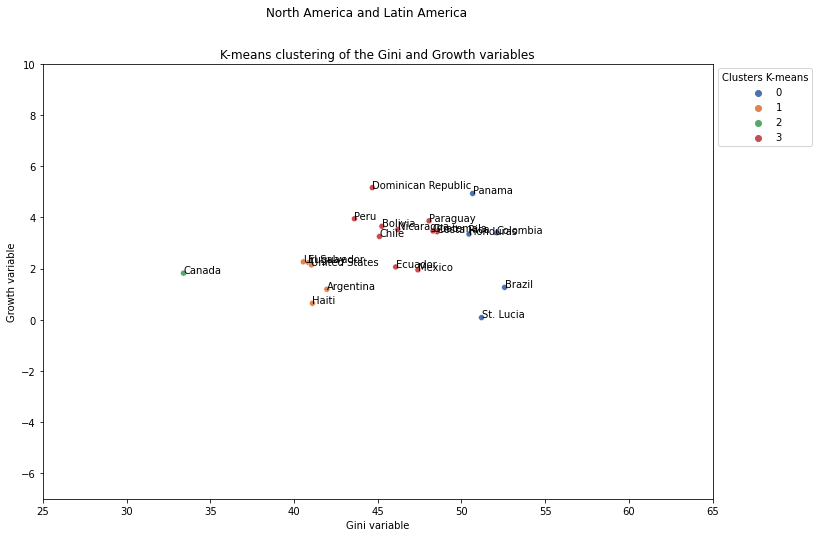

In [104]:
fig = plt.figure(figsize = (12,8))
sns.scatterplot(x='Gini_Var', y = 'Growth_Var', hue = 'ClusterID_K', legend = 'full', palette="deep", data = df_Gini_Growth_NA_LA)
plt.title('K-means clustering of the Gini and Growth variables')
plt.suptitle("North America and Latin America")
plt.ylabel("Growth variable")
plt.xlabel("Gini variable")
label_point(df_Gini_Growth_NA_LA.Gini_Var, df_Gini_Growth_NA_LA.Growth_Var, df_Gini_Growth_NA_LA.Country, plt.gca()) 
plt.legend(title='Clusters K-means', loc='center left', bbox_to_anchor = (1,0.9))
plt.xlim([25,65])
plt.ylim([-7,10])
plt.show()

In [105]:
Cluster_Growth = pd.DataFrame(df_Gini_Growth_NA_LA.groupby(['ClusterID_K']).Growth_Var.mean())
Cluster_Gini = pd.DataFrame(df_Gini_Growth_NA_LA.groupby(['ClusterID_K']).Gini_Var.mean())
dt_NA_LA_knn_Growth_Gini = pd.concat([Cluster_Growth, Cluster_Gini], axis = 1)
dt_NA_LA_knn_Growth_Gini

,Growth_Var,Gini_Var
ClusterID_K,,
0,2.606094,51.400000
1,1.694820,41.102909
2,1.821892,33.400000
3,3.433097,46.320455


### K-medoids clustering

In [106]:
df_Gini_Growth_NA_LA_KM = df_Gini_Growth_NA_LA[['Growth_Var', 'Gini_Var']]

In [107]:
sse_ = []
for k in range(2,10):
    kmedoids = KMedoids(n_clusters = k, method = 'pam').fit(df_Gini_Growth_NA_LA_KM)
    sse_.append([k, silhouette_score(df_Gini_Growth_NA_LA_KM, kmedoids.labels_)])
sse_

[[2, 0.5174154594053386],
 [3, 0.4496354343844507],
 [4, 0.47922359671531917],
 [5, 0.4692853934278406],
 [6, 0.49484806035856543],
 [7, 0.5026565168666081],
 [8, 0.46841286572729596],
 [9, 0.41424316919848747]]

In [108]:
DB_ = []
for k in range(2,10):
    kmedoids = KMedoids(n_clusters = k, random_state = 42).fit(df_Gini_Growth_NA_LA_KM)
    DB_.append([k, davies_bouldin_score(df_Gini_Growth_NA_LA_KM, kmedoids.labels_)])
DB_

[[2, 0.5974461600741964],
 [3, 0.6737197295083118],
 [4, 0.681700140741508],
 [5, 0.6263840122553319],
 [6, 0.601807445534211],
 [7, 0.5557616713592882],
 [8, 0.5463689808629009],
 [9, 0.7718914926913801]]

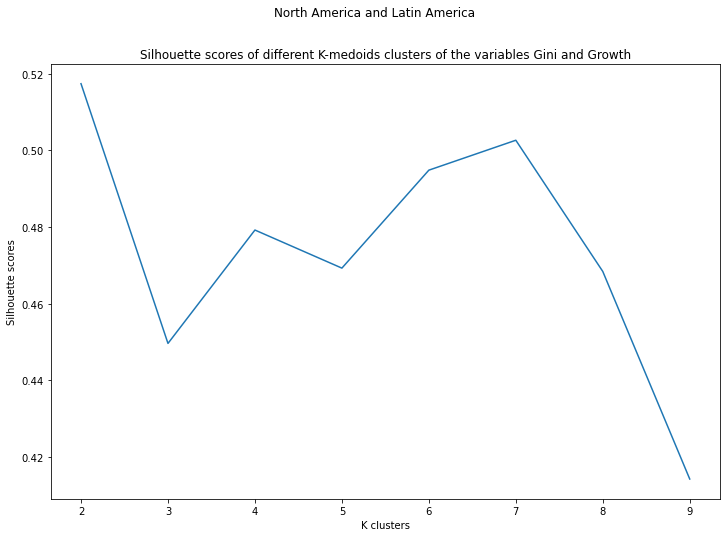

In [109]:
fig = plt.figure(figsize = (12,8))
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1])
plt.title("Silhouette scores of different K-medoids clusters of the variables Gini and Growth")
plt.ylabel("Silhouette scores")
plt.xlabel("K clusters")
plt.suptitle("North America and Latin America")
plt.show()

In [110]:
model_clus2 = KMedoids(n_clusters = 7, random_state = 42, method = 'pam')
model_clus2.fit(df_Gini_Growth_NA_LA_KM)
data2 = df_Gini_Growth_NA_LA_KM
data2.index = pd.RangeIndex(len(data2.index))
df_Gini_Growth_NA_LA_KM = pd.concat([data2, pd.Series(model_clus2.labels_)], axis = 1)
df_Gini_Growth_NA_LA_KM.columns = ['Growth_Var', 'Gini_Var', 'ClusterID_KM']
df_Gini_Growth_NA_LA_KM['ClusterID_KM'].value_counts()

1    5
2    5
4    3
3    3
6    2
5    2
0    1
Name: ClusterID_KM, dtype: int64

In [111]:
df_Gini_Growth_NA_LA = pd.merge(df_Gini_Growth_NA_LA, df_Gini_Growth_NA_LA_KM, how = 'inner', left_on=['Growth_Var', 'Gini_Var'], right_on=['Growth_Var', 'Gini_Var'])

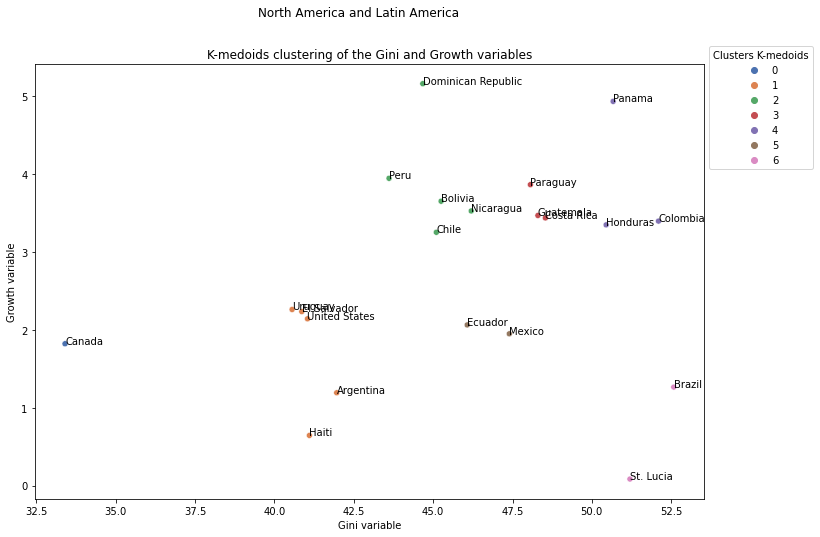

In [112]:
fig = plt.figure(figsize = (12,8))
sns.scatterplot(x='Gini_Var', y = 'Growth_Var', hue = 'ClusterID_KM', legend = 'full', palette="deep", data = df_Gini_Growth_NA_LA)
plt.title('K-medoids clustering of the Gini and Growth variables')
plt.suptitle("North America and Latin America")
plt.ylabel("Growth variable")
plt.xlabel("Gini variable")
label_point(df_Gini_Growth_NA_LA.Gini_Var, df_Gini_Growth_NA_LA.Growth_Var, df_Gini_Growth_NA_LA.Country, plt.gca()) 
plt.legend(title='Clusters K-medoids', loc='center left', bbox_to_anchor = (1,0.9))
plt.show()

In [113]:
Cluster_Growth = pd.DataFrame(df_Gini_Growth_NA_LA.groupby(['ClusterID_KM']).Growth_Var.mean())
Cluster_Gini = pd.DataFrame(df_Gini_Growth_NA_LA.groupby(['ClusterID_KM']).Gini_Var.mean())
dt_NA_LA_km_Growth_Gini = pd.concat([Cluster_Growth, Cluster_Gini], axis = 1)
dt_NA_LA_km_Growth_Gini

,Growth_Var,Gini_Var
ClusterID_KM,,
0,1.821892,33.400000
1,1.694820,41.102909
2,3.908894,44.966364
3,3.591239,48.300000
4,3.893986,51.073333
5,2.006393,46.736364
6,0.674255,51.890000


### AGNES algorithm

In [114]:
import scipy.cluster.hierarchy as shc
from scipy.cluster.hierarchy import fcluster
from sklearn.cluster import AgglomerativeClustering

In [115]:
df_Gini_Growth_NA_LA_A = df_Gini_Growth_NA_LA[['Growth_Var', 'Gini_Var']]

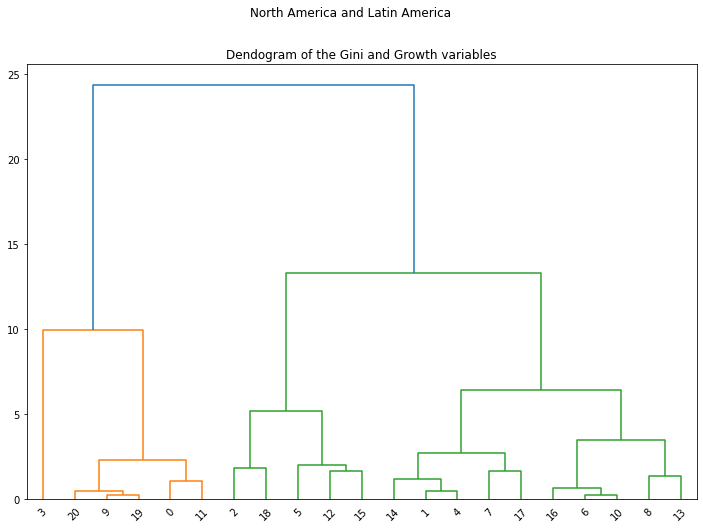

In [116]:
fig = plt.figure(figsize = (12,8))
plt.title('Dendogram of the Gini and Growth variables')
plt.suptitle("North America and Latin America")
dend = shc.dendrogram(shc.linkage(df_Gini_Growth_NA_LA_A, method = 'ward'))

In [117]:
sse_ = []
for k in range (2,10):
    clustering = AgglomerativeClustering(n_clusters = k, affinity = 'euclidean' ,linkage = 'ward')
    cluster_labels = clustering.fit_predict(df_Gini_Growth_NA_LA_A)
    silhouette_average = silhouette_score(df_Gini_Growth_NA_LA_A, cluster_labels)
    sse_.append([k, silhouette_average])
sse_

[[2, 0.5350840425276606],
 [3, 0.49001944662077446],
 [4, 0.4977812197085535],
 [5, 0.4584430423969256],
 [6, 0.4823785524415478],
 [7, 0.5026565168666081],
 [8, 0.48952593142445594],
 [9, 0.4610644851305929]]

In [118]:
DB_ = []
for k in range (2,10):
    clustering = AgglomerativeClustering(n_clusters = k, affinity = 'euclidean' ,linkage = 'ward')
    cluster_labels = clustering.fit_predict(df_Gini_Growth_NA_LA_A)
    davies_bouldin = davies_bouldin_score(df_Gini_Growth_NA_LA_A, cluster_labels)
    DB_.append([k, davies_bouldin])
DB_

[[2, 0.5971410605676568],
 [3, 0.648359564835051],
 [4, 0.48313450939066727],
 [5, 0.5620914010804249],
 [6, 0.5298200709058928],
 [7, 0.48647987785236896],
 [8, 0.5250691543441421],
 [9, 0.5256401459259995]]

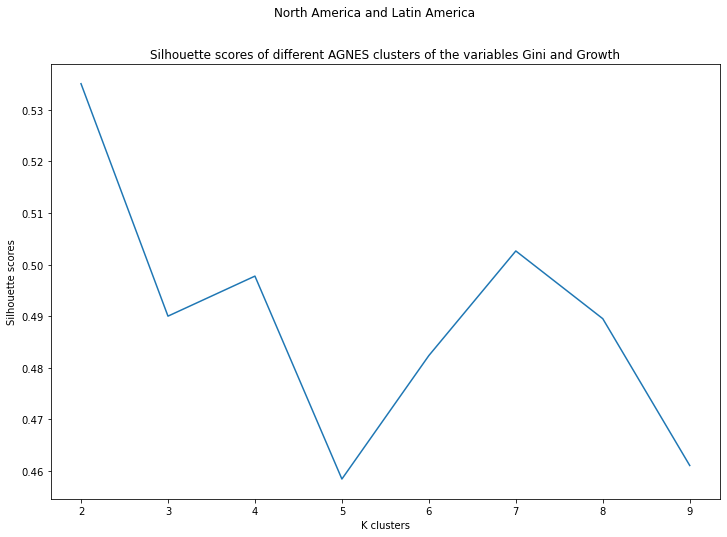

In [119]:
fig = plt.figure(figsize = (12,8))
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1])
plt.title("Silhouette scores of different AGNES clusters of the variables Gini and Growth")
plt.ylabel("Silhouette scores")
plt.xlabel("K clusters")
plt.suptitle("North America and Latin America")
plt.show()

In [120]:
cluster = AgglomerativeClustering(n_clusters = 7, affinity = 'euclidean' ,linkage = 'ward')
ClusterID_A = cluster.fit_predict(df_Gini_Growth_NA_LA_A)
ClusterID_A

array([1, 0, 5, 3, 0, 2, 6, 0, 4, 1, 6, 1, 2, 4, 0, 2, 6, 0, 5, 1, 1])

In [121]:
df_Gini_Growth_NA_LA['ClusterID_A'] = [1, 0, 5, 3, 0, 2, 6, 0, 4, 1, 6, 1, 2, 4, 0, 2, 6, 0, 5, 1, 1]

In [122]:
df_Gini_Growth_NA_LA['ClusterID_A'].value_counts()

1    5
0    5
2    3
6    3
5    2
4    2
3    1
Name: ClusterID_A, dtype: int64

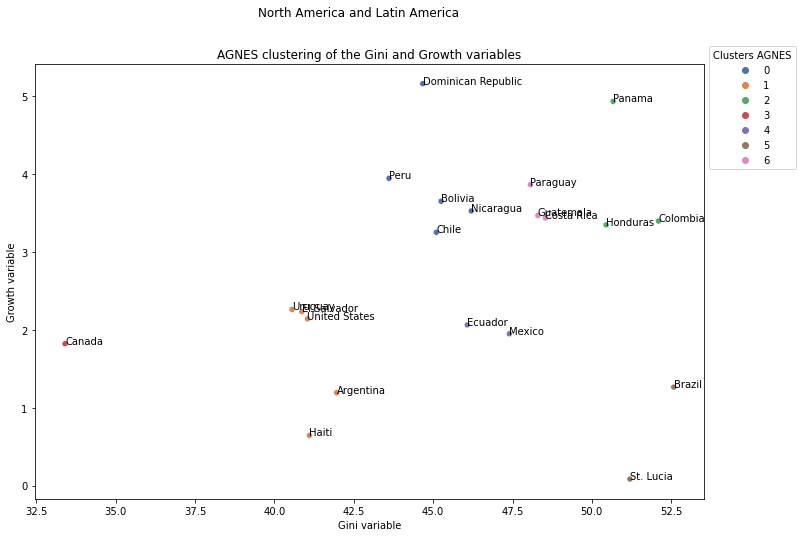

In [123]:
fig = plt.figure(figsize = (12,8))
sns.scatterplot(x='Gini_Var', y = 'Growth_Var', hue = 'ClusterID_A', legend = 'full', palette="deep", data = df_Gini_Growth_NA_LA)
plt.title('AGNES clustering of the Gini and Growth variables')
plt.suptitle("North America and Latin America")
plt.ylabel("Growth variable")
plt.xlabel("Gini variable")
label_point(df_Gini_Growth_NA_LA.Gini_Var, df_Gini_Growth_NA_LA.Growth_Var, df_Gini_Growth_NA_LA.Country, plt.gca()) 
#plt.xlim([25,65])
#plt.ylim([-7,10])
plt.legend(title='Clusters AGNES', loc='center left', bbox_to_anchor = (1,0.9))
plt.show()

### DIANA clustering

In [124]:
df_Gini_Growth_NA_LA_D = df_Gini_Growth_NA_LA[['Growth_Var', 'Gini_Var']]

In [125]:
from scipy.spatial import distance_matrix

def DIANA(data, n_clusters):
    n_samples = len(data)
    n_features = 2
    similarity_matrix = distance_matrix(data.values, data.values) # similarity matrix of the data
    clusters = [list(range(n_samples))]      # list of clusters, initially the whole dataset is a single cluster
    while True:
        c_diameters = [np.max(similarity_matrix[cluster][:, cluster]) for cluster in clusters]  #cluster diameters
        max_cluster_dia = np.argmax(c_diameters)  #maximum cluster diameter
        max_difference_index = np.argmax(np.mean(similarity_matrix[clusters[max_cluster_dia]][:, clusters[max_cluster_dia]], axis=1))
        splinters = [clusters[max_cluster_dia][max_difference_index]] #spinter group
        last_clusters = clusters[max_cluster_dia]
        del last_clusters[max_difference_index]
        while True:
            split = False
            for j in range(len(last_clusters))[::-1]:
                splinter_distances = similarity_matrix[last_clusters[j], splinters]
                last_distances = similarity_matrix[last_clusters[j], np.delete(last_clusters, j, axis=0)]
                if np.mean(splinter_distances) <= np.mean(last_distances):
                    splinters.append(last_clusters[j])
                    del last_clusters[j]
                    split = True
                    break
            if split == False:
                break
        del clusters[max_cluster_dia]
        clusters.append(splinters)
        clusters.append(last_clusters)
        if len(clusters) == n_clusters:
            break

    cluster_labels = np.zeros(n_samples)
    for i in range(len(clusters)):
        cluster_labels[clusters[i]] = i

    return cluster_labels

In [126]:
sse_ = []
for k in range (2,10):
    clustering = DIANA(df_Gini_Growth_NA_LA_D, k)
    silhouette_average = silhouette_score(df_Gini_Growth_NA_LA_D, clustering)
    sse_.append([k, silhouette_average])
sse_

[[2, 0.5324713292039253],
 [3, 0.4490029136653966],
 [4, 0.36291106032343107],
 [5, 0.45569350626214056],
 [6, 0.46964004287754385],
 [7, 0.4786707237751437],
 [8, 0.43324885703130805],
 [9, 0.3597256176494411]]

In [127]:
DB_ = []
for k in range (2,10):
    clustering = DIANA(df_Gini_Growth_NA_LA_D, k)
    davies_bouldin = davies_bouldin_score(df_Gini_Growth_NA_LA_D, clustering)
    DB_.append([k, davies_bouldin])
DB_

[[2, 0.27695915689452183],
 [3, 0.544697805519572],
 [4, 0.6173587967112592],
 [5, 0.5500591518191468],
 [6, 0.5263405523270577],
 [7, 0.5405469653471365],
 [8, 0.5017655949839139],
 [9, 0.4534952923493092]]

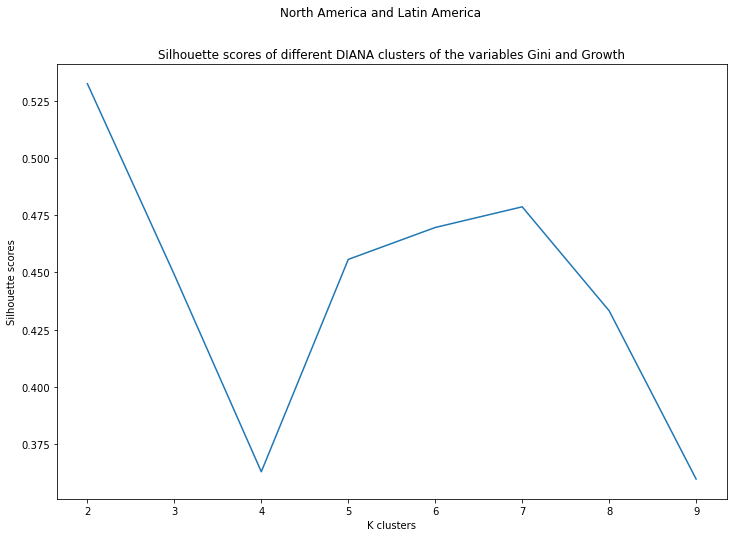

In [128]:
fig = plt.figure(figsize = (12,8))
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1])
plt.title("Silhouette scores of different DIANA clusters of the variables Gini and Growth")
plt.ylabel("Silhouette scores")
plt.xlabel("K clusters")
plt.suptitle("North America and Latin America")
plt.show()

In [129]:
DIANA(df_Gini_Growth_NA_LA_D, 7)

array([2., 1., 3., 0., 1., 4., 6., 1., 5., 2., 6., 2., 4., 5., 5., 4., 6.,
       1., 3., 2., 2.])

In [130]:
df_Gini_Growth_NA_LA['ClusterID_D'] = [round(float(i)) for i in [2., 1., 3., 0., 1., 4., 6., 1., 5., 2., 6., 2., 4., 5., 5., 4., 6.,
       1., 3., 2., 2.]]

In [131]:
df_Gini_Growth_NA_LA['ClusterID_D'].value_counts()

2    5
1    4
4    3
6    3
5    3
3    2
0    1
Name: ClusterID_D, dtype: int64

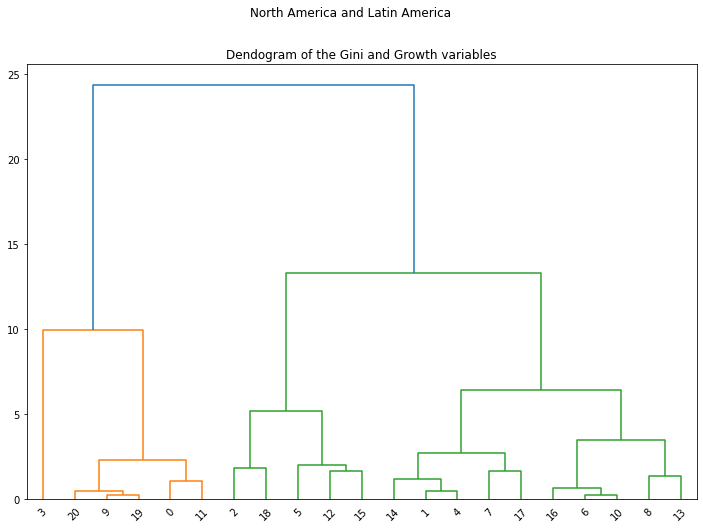

In [132]:
fig = plt.figure(figsize = (12,8))
plt.title('Dendogram of the Gini and Growth variables')
plt.suptitle("North America and Latin America")
dend = shc.dendrogram(shc.linkage(df_Gini_Growth_NA_LA_D, method = 'ward'))

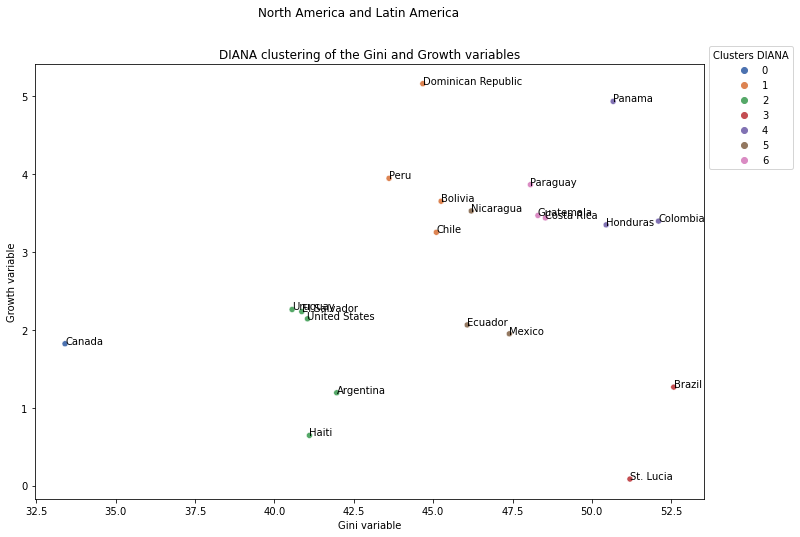

In [133]:
fig = plt.figure(figsize = (12,8))
sns.scatterplot(x='Gini_Var', y = 'Growth_Var', hue = 'ClusterID_D', legend = 'full', palette="deep", data = df_Gini_Growth_NA_LA)
plt.title('DIANA clustering of the Gini and Growth variables')
plt.suptitle("North America and Latin America")
plt.ylabel("Growth variable")
plt.xlabel("Gini variable")
label_point(df_Gini_Growth_NA_LA.Gini_Var, df_Gini_Growth_NA_LA.Growth_Var, df_Gini_Growth_NA_LA.Country, plt.gca()) 
plt.legend(title='Clusters DIANA', loc='center left', bbox_to_anchor = (1,0.9))
plt.show()